![Arrondissements de paris](./images/illustration.png)

**Elias TOURNEUX** et **Yann VILLELLAS**
TD I, étudiant à l'ESILV en A3, promo 2025
### Mini-rapport :
#### Avancement et difficultés :
Nous avons eu beaucoup de problèmes lors du tri des données. Certaines valeurs étaient faussées, comme par exemple la surface inférieur à 1 m² par exemple, ou encore des noms de ville avec un tiret, parfois sans espace, parfois avec un espace, etc...
Nous avons donc du faire beaucoup de tests pour pouvoir trier les données correctement. Nous avons aussi eu des problèmes avec certains graphiques, car nous avions des difficultés pour comprendre à comment manipuler nos données pour faire apparaître les informations que nous souhaitions montrer. Nous avons donc du faire beaucoup de recherches en amont.
Nous avons souhaités faire des cartes dynamiques à l'aide de Folium, et cela nous a aussi pris beaucoup de temps pour comprendre le concept de geojson.

Pour Django, nous avons beaucoup eu de problèmes avec l'URL Rewriting, et comment faire pour permettre de changer dynamiquement un graphique (par exemple, pour trier la surface moyenne par régions).

Au final nous sommes très fier de ce que nous avons créé, et nous avons appris beaucoup de choses sur le traitement de données, et sur Django.

#### Ratio de contribution:
 - Elias TOURNEUX : 50 %
 - Yann VILLELLAS : 50 %


## Introduction

### Import des différents modules utiles au projet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
import requests
import matplotlib.cm as cm
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from scipy.stats import norm

pio.renderers.default = "notebook_connected"
pd.options.mode.chained_assignment = None


### Import des données de 2019 et 2022 depuis l'Open Data du gouvernement

In [2]:
dvf2022 = pd.read_csv("valeursfoncieres-2022.txt", sep="|", low_memory=False)
dvf2019 = pd.read_csv("valeursfoncieres-2019.txt", sep="|", low_memory=False)

### On peut observer la nature de nos données
On observe que les données sont de type DataFrame, et qu'elles sont composées de 3803885 lignes et de 43 colonnes pour les valeurs de 2022.
Le jeu de données de 2019 est quasiment identique, et possède les mêmes en-têtes.

On va supprimer les colonnes qui ne nous intéressent pas pour notre analyse.

In [3]:
dvf2022

Identifiant de document  Reference document  1 Articles CGI  \
0                            NaN                 NaN             NaN   
1                            NaN                 NaN             NaN   
2                            NaN                 NaN             NaN   
3                            NaN                 NaN             NaN   
4                            NaN                 NaN             NaN   
...                          ...                 ...             ...   
3803880                      NaN                 NaN             NaN   
3803881                      NaN                 NaN             NaN   
3803882                      NaN                 NaN             NaN   
3803883                      NaN                 NaN             NaN   
3803884                      NaN                 NaN             NaN   

         2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0                   NaN             NaN             NaN             NaN   
1                   NaN             NaN             NaN             NaN   
2                   NaN             NaN             NaN             NaN   
3                   NaN             NaN             NaN             NaN   
4                   NaN             NaN             NaN             NaN   
...                 ...             ...             ...             ...   
3803880             NaN             NaN             NaN             NaN   
3803881             NaN             NaN             NaN             NaN   
3803882             NaN             NaN             NaN             NaN   
3803883             NaN             NaN             NaN             NaN   
3803884             NaN             NaN             NaN             NaN   

         No disposition Date mutation Nature mutation  ...  \
0                     1    03/01/2022           Vente  ...   
1                     1    03/01/2022           Vente  ...   
2                     1    03/01/2022           Vente  ...   
3                     1    03/01/2022           Vente  ...   
4                     1    04/01/2022           Vente  ...   
...                 ...           ...             ...  ...   
3803880               1    30/12/2022           Vente  ...   
3803881               1    19/12/2022           Vente  ...   
3803882               1    19/12/2022           Vente  ...   
3803883               1    30/12/2022           Vente  ...   
3803884               1    21/11/2022           Vente  ...   

        Surface Carrez du 5eme lot  Nombre de lots Code type local  \
0                              NaN               1             2.0   
1                              NaN               0             NaN   
2                              NaN               0             NaN   
3                              NaN               1             2.0   
4                              NaN               0             NaN   
...                            ...             ...             ...   
3803880                        NaN               1             4.0   
3803881                        NaN               2             3.0   
3803882                        NaN               2             2.0   
3803883                        NaN               1             3.0   
3803884                        NaN               1             3.0   

                                       Type local Identifiant local  \
0                                     Appartement               NaN   
1                                             NaN               NaN   
2                                             NaN               NaN   
3                                     Appartement               NaN   
4                                             NaN               NaN   
...                                           ...               ...   
3803880  Local industriel. commercial ou assimilé               NaN   
3803881                                Dépendance               NaN   
3803882           

### Nettoyage des données
En effet, nous avons remarqué que certaines données étaient manquantes ou encore inutiles dans notre analyse (comme les références des articles, documents, etc...) nous avons donc décidé de les supprimer.

#### Regardons la part de nos données qui sont nuls

In [4]:
dvf2022.isnull().sum()/len(dvf2022)*100

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.649888
No voie                        34.733621
B/T/Q                          95.374019
Type de voie                   36.984294
Code voie                       1.026398
Voie                            1.029290
Code postal                     1.029816
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.824295
Section                         0.004075
No plan                         0.000000
No Volume                      99.765792
1er lot         

On peut observer que certaines colonnes sont composées de beaucoup ou presque que des valeurs nulles comme : 3ème lot, 4ème lot, 5ème lot et leurs surfaces Carrez associé. Cela signifie qu'on a une grande proportionnalité de valeurs foncières avec un ou deux lots.
On remarque qu'un tiers des valeurs foncières correspondent à des terrains.

#### Observons les différents types de nature de mutation

In [5]:
type_nature = dvf2022['Nature mutation'].unique()
# Pourcentage de chaque type de mutation
for i in type_nature:
    print(i, ":", len(dvf2022[dvf2022['Nature mutation'] == i])/len(dvf2022)*100)

# On ne garde que les mutations de type "vente" et "vente en l'état futur d'achèvement"
dvf2022 = dvf2022[dvf2022['Nature mutation'].isin(["Vente", "Vente en l'état futur d'achèvement"])]

Vente : 92.60445570778296
Vente en l'état futur d'achèvement : 6.041507563977355
Echange : 0.888354931865711
Vente terrain à bâtir : 0.30968338948206897
Adjudication : 0.13799050181590664
Expropriation : 0.018007905075994673


On observe que le type "Vente" et "Vente en l'état futur d'achèvement" sont les plus représentés dans notre jeu de données. On peut donc en déduire que les ventes sont les plus fréquentes. Nous allons donc nous concentrer sur ces deux types de mutations, étant donné qu'elles représentent plus de 99% de nos données.

In [6]:
#Suppression des colonnes inutiles pour les demandes des valeurs foncières de 2022
dvf2022 = dvf2022.drop(['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI','5 Articles CGI', 'No disposition', 'No voie'], axis=1)
dvf2022 = dvf2022.drop(['B/T/Q', 'Type de voie', 'Code voie', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume'], axis=1)
dvf2022 = dvf2022.drop(['Voie','Nature culture speciale', 'Identifiant local', 'Nombre de lots', '3eme lot', 'Surface Carrez du 3eme lot', '5eme lot', 'Surface Carrez du 5eme lot', '4eme lot', 'Surface Carrez du 4eme lot'], axis=1)

#Même chose pour les demandes des valeurs foncières de 2019
dvf2019 = dvf2019.drop(['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI','5 Articles CGI', 'No disposition', 'No voie'], axis=1)
dvf2019 = dvf2019.drop(['B/T/Q', 'Type de voie', 'Code voie', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume'], axis=1)
dvf2019 = dvf2019.drop(['Voie','Nature culture speciale', 'Identifiant local', 'Nombre de lots', '3eme lot', 'Surface Carrez du 3eme lot', '5eme lot', 'Surface Carrez du 5eme lot', '4eme lot', 'Surface Carrez du 4eme lot'], axis=1)

#ValueError: could not convert string to float: '55000,00' --> On convertit les valeurs foncières en float
dvf2022['Valeur fonciere'] = dvf2022['Valeur fonciere'].str.replace(',', '.').astype(float)
dvf2019['Valeur fonciere'] = dvf2019['Valeur fonciere'].str.replace(',', '.').astype(float)

#On avait une erreur vu qu'on pouvait pas calculer sur des strings
dvf2022['Surface reelle bati'] = dvf2022['Surface reelle bati'].astype(float)
dvf2019['Surface reelle bati'] = dvf2019['Surface reelle bati'].astype(float)

#On créé une nouvelle colonne qui contient le prix au mètre carré qui est la sormme des Surface Carrez
dvf2022['Surface Carrez du 1er lot'] = dvf2022['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
dvf2022['Surface Carrez du 2eme lot'] = dvf2022['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)

dvf2019['Surface Carrez du 1er lot'] = dvf2019['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
dvf2019['Surface Carrez du 2eme lot'] = dvf2019['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)


#On remplace toutes les valeurs nulles par 0
dvf2022 = dvf2022.fillna(0)
dvf2019 = dvf2019.fillna(0)

dvf2022['Metre carre'] = dvf2022['Surface Carrez du 1er lot'].astype(float) + dvf2022['Surface Carrez du 2eme lot'].astype(float)
dvf2019['Metre carre'] = dvf2019['Surface Carrez du 1er lot'].astype(float) + dvf2019['Surface Carrez du 2eme lot'].astype(float)

#Enleve les valeurs en double
dvf2022 = dvf2022.drop_duplicates(subset=['Date mutation', 'Valeur fonciere', 'Surface reelle bati', 'Metre carre'], keep='first')
dvf2019 = dvf2019.drop_duplicates(subset=['Date mutation', 'Valeur fonciere', 'Surface reelle bati', 'Metre carre'], keep='first')

# On fait un nouveau tableau contenant que des "Metre carre" non nuls
dvf2022_metre_carre = dvf2022[dvf2022['Metre carre'] >= 1]
dvf2019_metre_carre = dvf2019[dvf2019['Metre carre'] >= 1]

#On remplace le nom des communes avec un - par un espace (car plusieurs communes ont le même nom mais s'écrivent différemment)
dvf2022_metre_carre['Commune'] = dvf2022_metre_carre['Commune'].str.replace('-', ' ')
dvf2019_metre_carre['Commune'] = dvf2019_metre_carre['Commune'].str.replace('-', ' ')

#On affiche le tableau
dvf2022

Date mutation Nature mutation  Valeur fonciere  Code postal  \
0          03/01/2022           Vente          55000.0       1000.0   
1          03/01/2022           Vente         143000.0       1480.0   
3          03/01/2022           Vente         143000.0       1480.0   
4          04/01/2022           Vente            300.0       1480.0   
5          06/01/2022           Vente         255000.0       1560.0   
...               ...             ...              ...          ...   
3803870    29/12/2022           Vente        1650000.0      75016.0   
3803880    30/12/2022           Vente        3500000.0      75014.0   
3803881    19/12/2022           Vente         525000.0      75015.0   
3803882    19/12/2022           Vente         525000.0      75015.0   
3803883    30/12/2022           Vente          15500.0      75013.0   

                   Commune Code departement 1er lot  \
0          BOURG-EN-BRESSE               01       7   
1                SAVIGNEUX               01       0   
3                SAVIGNEUX               01       1   
4        MESSIMY SUR SAONE               01       0   
5         MANTENAY-MONTLIN               01       0   
...                    ...              ...     ...   
3803870           PARIS 16               75     105   
3803880           PARIS 14               75       3   
3803881           PARIS 15               75      49   
3803882           PARIS 15               75      49   
3803883           PARIS 13               75     244   

         Surface Carrez du 1er lot 2eme lot  Surface Carrez du 2eme lot  \
0                            24.10        0                         0.0   
1                             0.00        0                         0.0   
3                           123.23        0                         0.0   
4                             0.00        0                         0.0   
5                             0.00        0                         0.0   
...                            ...      ...                         ...   
3803870                     154.75      150                         0.0   
3803880                       0.00        0                         0.0   
3803881                      46.65       50                         0.0   
3803882                      46.65       50                         0.0   
3803883                       0.00        0                         0.0   

         Code type local                                Type local  \
0                    2.0                               Appartement   
1                    0.0                                         0   
3                    2.0                               Appartement   
4                    0.0                                         0   
5                    1.0                                    Maison   
...                  ...                                       ...   
3803870              2.0                               Appartement   
3803880              4.0  Local industriel. commercial ou assimilé   
3803881              3.0                                Dépendance   
3803882              2.0                               Appartement   
3803883              3.0                                Dépendance   

         Surface reelle bati  Nombre pieces principales Nature culture  \
0                       24.0                        1.0              0   
1                        0.0                        0.0              S   
3                      140.0                        3.0              0   
4                        0.0                        0.0              T   
5                      108.0                        5.0              S   
...                      ...                        ...            ...   
3803870                150.0                        6.0              0   
3803880                327.0                        0.0              0   
3803881                  0.0                        0.0              0   
3803882     

On remarque qu'après le traitement, nous avons perdus 2 132 360 lignes. Cela représente 43.94% de nos données.

#### Les valeurs infinies
Lors de notre analyse, nous avons remarqué que certaines valeurs étaient infinies. Pour palier à ça, nous avons remarqué que cela occurait lorsque les valeurs foncières valaient 0. On remarque donc qu'il y a 1830 valeurs foncières nulles. Nous avons donc décidé de supprimer ces valeurs.

In [7]:
dvf2022[dvf2022['Valeur fonciere'] <= 0]

#On supprime les valeurs négatives
dvf2022 = dvf2022[dvf2022['Valeur fonciere'] > 0]
dvf2019 = dvf2019[dvf2019['Valeur fonciere'] > 0]

In [8]:
#On convertit les dates en datetime
dvf2022['Date mutation'] = pd.to_datetime(dvf2022['Date mutation'], format='%d/%m/%Y')

## Début de l'analyse de notre jeu de données

### 1. Quel département a le prix moyen au mètre carré le plus élevé ?

In [9]:
prix_m2_departement_2022 = dvf2022_metre_carre.groupby('Code departement')['Valeur fonciere'].mean() / dvf2022_metre_carre.groupby('Code departement')['Metre carre'].mean()

#On affiche
prix_m2_departement_2022.idxmax()

'75'

### 2. Quel département a le prix moyen du terrain au mètre carré le plus élevé ?

In [10]:
prix_m2_terrain_departement_2022 = dvf2022.groupby('Code departement')['Valeur fonciere'].mean() / dvf2022.groupby('Code departement')['Surface terrain'].mean()

#On affiche
prix_m2_terrain_departement_2022.idxmax()

'75'

### 3. Représentation graphique du prix moyen au mètre carré par département

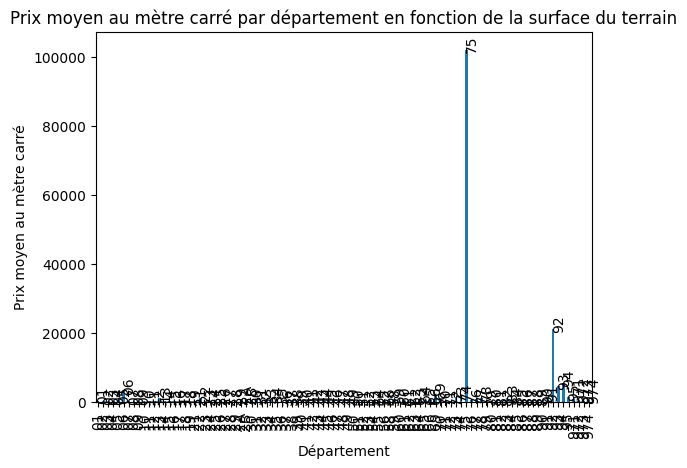

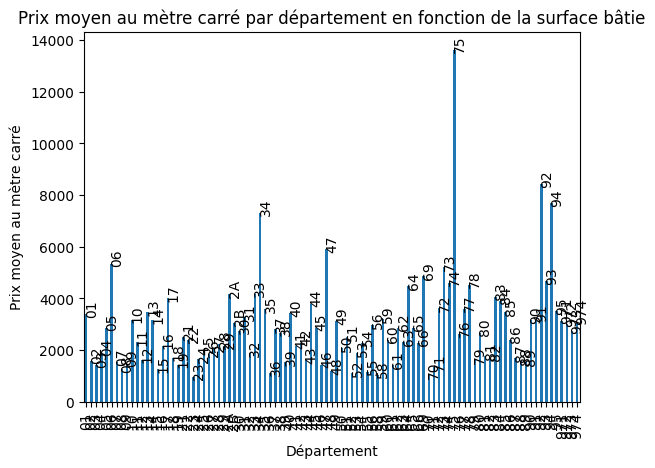

In [11]:
# Graphique du prix moyen au mètre carré par département en fonction de la surface du terrain
fig, ax = plt.subplots()
prix_m2_terrain_departement_2022.plot(kind='bar', x='Code departement', y='Prix moyen au mètre carré')
ax.set_xlabel('Département')
ax.set_ylabel('Prix moyen au mètre carré')
ax.set_title('Prix moyen au mètre carré par département en fonction de la surface du terrain')
for i, v in enumerate(prix_m2_terrain_departement_2022):
    ax.text(i-0.3, v+10, str(prix_m2_terrain_departement_2022.index[i]), rotation=90)

# Graphique du prix moyen au mètre carré par département en fonction de la surface bâtie
fig, ax = plt.subplots()
prix_m2_departement_2022.plot(kind='bar', x='Code departement', y='Prix moyen au mètre carré')
ax.set_xlabel('Département')
ax.set_ylabel('Prix moyen au mètre carré')
ax.set_title('Prix moyen au mètre carré par département en fonction de la surface bâtie')
for i, v in enumerate(prix_m2_departement_2022):
    ax.text(i-0.3, v+10, str(prix_m2_departement_2022.index[i]), rotation=90)

plt.show()

### 4. Quelle est la ville ayant le prix moyen au mètre carré le plus élevé ?

In [12]:
#On garde que les prix au mètre carré supérieur à 1 (car division entre un entier entre 0 et 1 donne l'infini)
dvf2022_metre_carre = dvf2022_metre_carre[dvf2022_metre_carre['Metre carre'] > 1]

ville_prix_moyen_eleve_2022 = dvf2022_metre_carre.groupby('Commune')['Valeur fonciere'].mean() / dvf2022_metre_carre.groupby('Commune')['Metre carre'].mean()

#On affiche
ville_prix_moyen_eleve_2022.idxmax()

'LA BOURDINIERE SAINT LOUP'

### 5. Quel est le type de bien ayant le prix moyen au mètre carré le plus élevé ?


In [13]:
type_de_bien_2022 = dvf2022_metre_carre.groupby('Type local')['Valeur fonciere'].mean()

#On affiche
type_de_bien_2022.idxmax()

'Local industriel. commercial ou assimilé'

### 6. Analyse du prix moyen au mètre carré dans les arrondissements de Paris

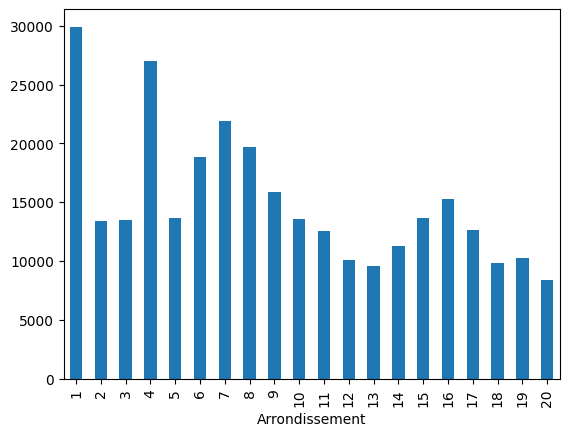

In [14]:
#Analyse du prix moyen au mètre carré dans les arrondissements de Paris

#On créé un nouveau tableau qui contient que les arrondissements de Paris
dvf2022_paris = dvf2022_metre_carre[dvf2022_metre_carre['Code departement'] == '75']

#On créé une colonne pour le numéro de l'arrondissement
dvf2022_paris['Arrondissement'] = dvf2022_paris['Commune'].str.split(' ').str[1].astype(int)

#On récupère la moyenne du prix au mètre carré par arrondissement
prix_m2_arrondissement_2022 = dvf2022_paris.groupby('Arrondissement')['Valeur fonciere'].mean() / dvf2022_paris.groupby('Arrondissement')['Metre carre'].mean()

#Plot en histogramme
prix_m2_arrondissement_2022.plot(kind='bar', x='Arrondissement', y='Prix moyen au mètre carré')

# Créer une carte centrée sur Paris
paris_map = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Trouver le prix moyen le plus élevé
max_prix_m2 = prix_m2_arrondissement_2022.max()

geojson_url = f"https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson"
geojson_json = requests.get(geojson_url).json()

colors = ['#ff0000', '#ff3300', '#ff6600', '#ff9900', '#ffcc00', '#ffff00', '#e6ff00', '#ccff00', '#b3ff00', '#99ff00', '#80ff00', '#66ff00', '#4dff00', '#33ff00', '#1aff00', '#00ff00', '#00e600', '#00cc00', '#00b300', '#009900']

# Boucler sur chaqu et ajouter un polygone à la carte
for arrondissement in prix_m2_arrondissement_2022.index:
    prix_m2 = prix_m2_arrondissement_2022[arrondissement]

    # Tri de prix_m2_arrondissement_2022 par ordre croissant
    prix_m2_arrondissement_2022 = prix_m2_arrondissement_2022.sort_values()
    
    # Définir la valeur maximale de prix au mètre carré
    max_price = prix_m2_arrondissement_2022.max()
    min_price = prix_m2_arrondissement_2022.min()  

    for coord in geojson_json['features']:
        arrondissement_insee = arrondissement < 10 and "0" + str(arrondissement) or str(arrondissement)
        if coord['properties']['code'] == "751"+str(arrondissement_insee):
            color = colors[arrondissement-1]
            # Ajoute color à coord['geometry']['color']
            coord['geometry']['color'] = color

            #Calculer le centre de l'arrondissement
            center = [sum([coord['geometry']['coordinates'][0][i][1] for i in range(len(coord['geometry']['coordinates'][0]))]) / len(coord['geometry']['coordinates'][0]), sum([coord['geometry']['coordinates'][0][i][0] for i in range(len(coord['geometry']['coordinates'][0]))]) / len(coord['geometry']['coordinates'][0])]
            folium.GeoJson(data=coord['geometry'], style_function=lambda x: {"fillColor": x['geometry']['color'], "color": x['geometry']['color']}).add_to(paris_map)
            
            # Ajouter le prix moyen au mètre carré
            folium.Marker(center, popup="Arrondissement "+str(arrondissement)+" : "+str(round(prix_m2,2))+" €/m²").add_to(paris_map)
            break

# Ajouter un contrôle de couches
folium.LayerControl().add_to(paris_map)

# Afficher la carte
paris_map.save("carte_paris.html")

#Convertit prix_m2_arrondissement_2022 en dataframe
prix_m2_arrondissement_2022 = prix_m2_arrondissement_2022.to_frame()

#On créé une colonne pour le numéro de l'arrondissement
condition = prix_m2_arrondissement_2022.index < 10
prix_m2_arrondissement_2022['code_postal_insee'] = np.where(condition, "7510" + prix_m2_arrondissement_2022.index.astype(str), "751" + prix_m2_arrondissement_2022.index.astype(str))

prix_m2_arrondissement_2022 = prix_m2_arrondissement_2022.reset_index()
prix_m2_arrondissement_2022 = prix_m2_arrondissement_2022.rename(columns={'Arrondissement': 'Arrondissement', 0:'Prix moyen au mètre carré', 'code_postal_insee':'Code postal insee'})

fig = px.choropleth(prix_m2_arrondissement_2022,
                    geojson=geojson_json,
                    locations='Code postal insee',
                    color='Prix moyen au mètre carré',
                    color_continuous_scale='sunsetdark',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Analyse du prix moyen au mètre carré dans les arrondissements de Paris')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

### 7. Analyse du prix moyen au mètre carré dans les arrondissements de Marseille

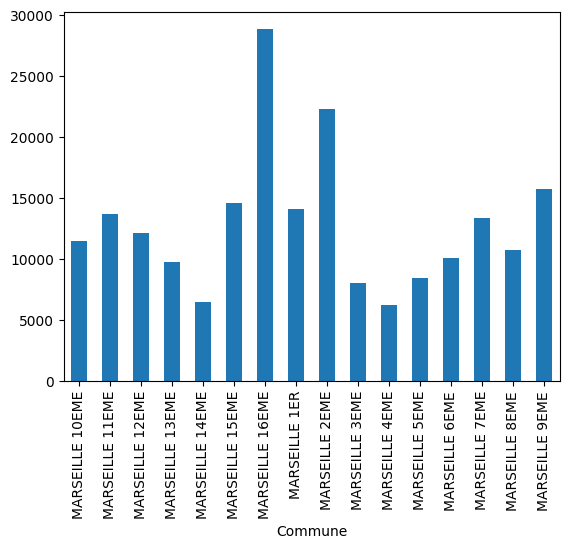

In [15]:
#Analyse du prix moyen au mètre carré dans les arrondissements de Marseille

#On créé un nouveau tableau qui contient que les arrondissements de Marseille
dvf2022_marseille = dvf2022[dvf2022['Code departement'] == '13']

#On group by sur la commune pour voir les différentes communes de Marseille
prix_m2_arrondissement_2022_marseille = dvf2022_marseille.groupby('Commune')['Valeur fonciere'].mean() / dvf2022_marseille.groupby('Commune')['Metre carre'].mean()

#On garde que les arrondissements de Marseille
prix_m2_arrondissement_2022_marseille = prix_m2_arrondissement_2022_marseille[prix_m2_arrondissement_2022_marseille.index.str.contains('MARSEILLE')]

#Plot en histogramme
prix_m2_arrondissement_2022_marseille.plot(kind='bar', x='Arrondissement', y='Prix moyen au mètre carré')

geojson_url_marseille = f"https://france-geojson.gregoiredavid.fr/repo/departements/13-bouches-du-rhone/communes-13-bouches-du-rhone.geojson"
geojson_json_marseille = requests.get(geojson_url_marseille).json()

df_marseille = pd.DataFrame(prix_m2_arrondissement_2022_marseille, columns=['Prix moyen au mètre carré'])

#On ajoute la colonne code postal insee
df_marseille['code_postal_insee'] = np.where(df_marseille.index.str.contains('MARSEILLE 1ER'), "13201", np.where(df_marseille.index.str.contains('MARSEILLE 2EME'), "13202", np.where(df_marseille.index.str.contains('MARSEILLE 3EME'), "13203", np.where(df_marseille.index.str.contains('MARSEILLE 4EME'), "13204", np.where(df_marseille.index.str.contains('MARSEILLE 5EME'), "13205", np.where(df_marseille.index.str.contains('MARSEILLE 6EME'), "13206", np.where(df_marseille.index.str.contains('MARSEILLE 7EME'), "13207", np.where(df_marseille.index.str.contains('MARSEILLE 8EME'), "13208", np.where(df_marseille.index.str.contains('MARSEILLE 9EME'), "13209", np.where(df_marseille.index.str.contains('MARSEILLE 10'), "13210", np.where(df_marseille.index.str.contains('MARSEILLE 11'), "13211", np.where(df_marseille.index.str.contains('MARSEILLE 12'), "13212", np.where(df_marseille.index.str.contains('MARSEILLE 13'), "13213", np.where(df_marseille.index.str.contains('MARSEILLE 14'), "13214", np.where(df_marseille.index.str.contains('MARSEILLE 15'), "13215", np.where(df_marseille.index.str.contains('MARSEILLE 16'), "13216", "0"))))))))))))))))

fig = px.choropleth(df_marseille,
                    geojson=geojson_json_marseille,
                    locations='code_postal_insee',
                    color='Prix moyen au mètre carré',
                    color_continuous_scale='sunsetdark',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Analyse du prix moyen au mètre carré dans les arrondissements de Marseille')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()


### 8. Analyse du prix moyen au mètre carré en fonction de la nature du bien

<AxesSubplot: xlabel='Nature mutation'>

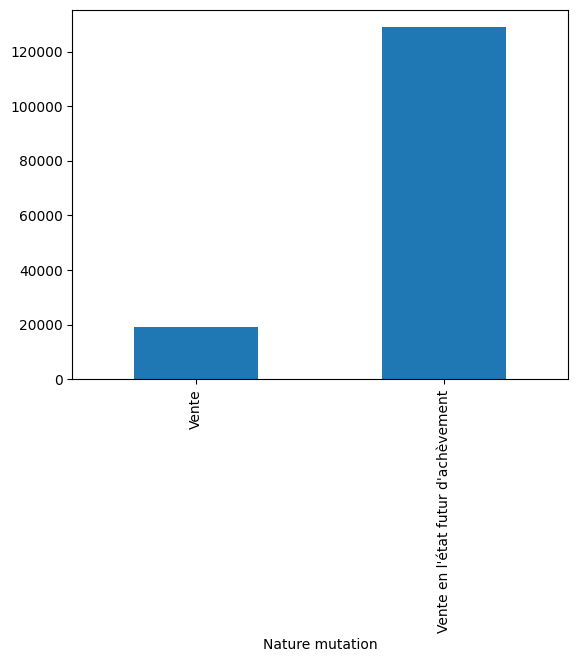

In [16]:
#Analyse du prix moyen au mètre carré en fonction de la nature du bien

prix_en_fonction_nature = dvf2022.groupby('Nature mutation')['Valeur fonciere'].mean() / dvf2022_marseille.groupby('Nature mutation')['Metre carre'].mean()

#on plot
prix_en_fonction_nature.plot(kind='bar', x='Commune', y='Prix moyen au mètre carré')

### 9. Top 10 des villes avec un prix au mètre carré le plus élevé

<AxesSubplot: xlabel='Commune'>

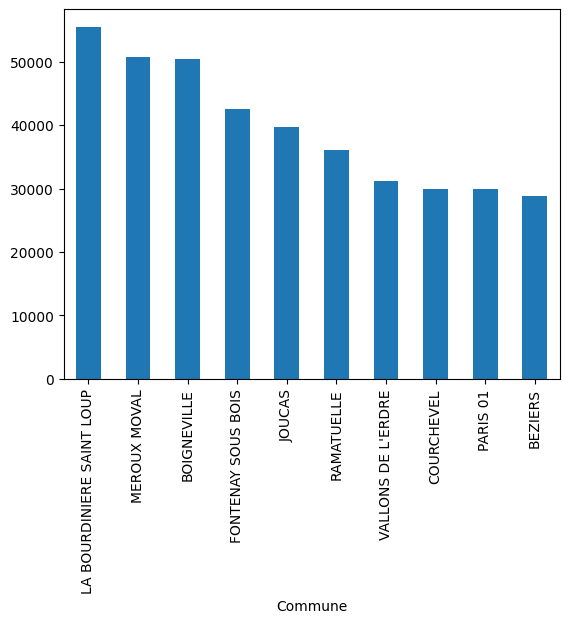

In [17]:
#Top 10 des villes avec un prix au mètre carré le plus élevé

top_10 = dvf2022_metre_carre.groupby('Commune')['Valeur fonciere'].mean() / dvf2022_metre_carre.groupby('Commune')['Metre carre'].mean()

#On trie par ordre décroissant
top_10 = top_10.sort_values(ascending=False)

#On garde que les 10 premiers
top_10 = top_10.head(10)

#On plot
top_10.plot(kind='bar', x='Commune', y='Prix moyen au mètre carré')



### 10. Top 10 des communes avec un prix au mètre carré le plus élevé dans la petite couronne parisienne

<AxesSubplot: xlabel='Commune'>

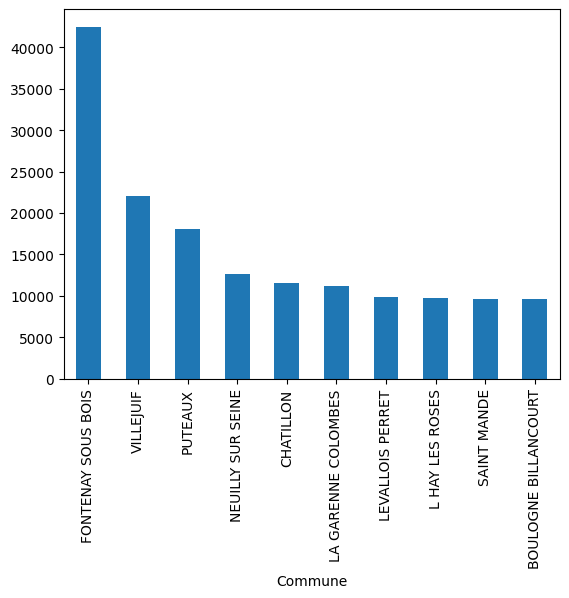

In [18]:
#Top 10 des communes avec un prix au mètre carré le plus élevé dans la petite couronne parisienne

#On créé un nouveau tableau qui contient que les arrondissements de la petite couronne parisienne
dvf2022_petite_couronne = dvf2022_metre_carre[dvf2022_metre_carre['Code departement'].isin(['92', '93', '94'])]

#On group by sur la commune pour voir les différentes communes de la petite couronne parisienne
prix_m2_petite_couronne = dvf2022_petite_couronne.groupby('Commune')['Valeur fonciere'].mean() / dvf2022_petite_couronne.groupby('Commune')['Metre carre'].mean()

#On trie par ordre décroissant
prix_m2_petite_couronne = prix_m2_petite_couronne.sort_values(ascending=False)

#On garde que les 10 premiers
prix_m2_petite_couronne = prix_m2_petite_couronne.head(10)

#On plot
prix_m2_petite_couronne.plot(kind='bar', x='Commune', y='Prix moyen au mètre carré')


### 11. Les 10 villes avec le plus de ventes

<AxesSubplot: xlabel='Commune'>

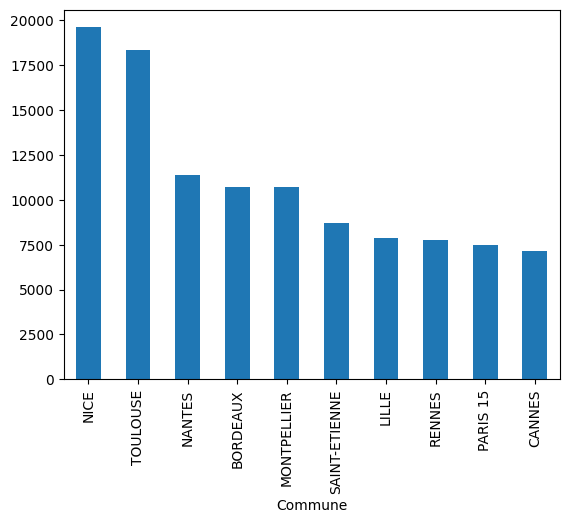

In [19]:
top_10_ventes = dvf2022.groupby('Commune')['Valeur fonciere'].count()

#On trie par ordre décroissant
top_10_ventes = top_10_ventes.sort_values(ascending=False)

#On garde que les 10 premiers
top_10_ventes = top_10_ventes.head(10)

#On plot
top_10_ventes.plot(kind='bar', x='Commune', y='Nombre de ventes')

### 12. Comparaison du prix moyen du mètre carré entre les différentes régions de France

<AxesSubplot: ylabel='Prix moyen au mètre carré'>

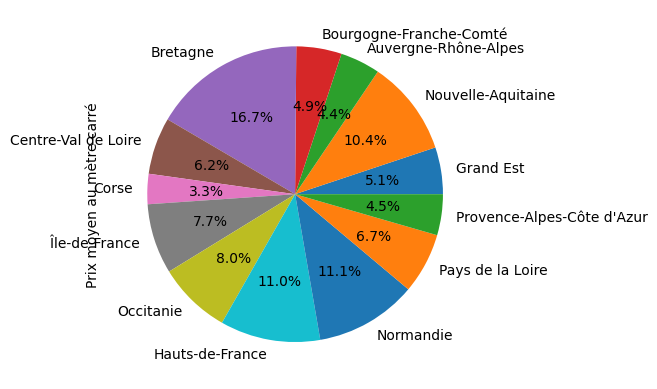

In [20]:
#Comparaison du prix moyen du mètre carré entre les différentes régions de France

group_by_department = dvf2022.groupby('Code departement')['Valeur fonciere'].mean() / dvf2022.groupby('Code departement')['Metre carre'].mean()

#On enlève les départements d'outre mer
group_by_department = group_by_department.drop(['971', '972', '973', '974'])

#On regroupe par région
region = {
    "Grand Est": ['08', '10', '51', '52', '54', '55', '88'], #'57', '67', '68', manquant car le dvf ne contient pas l'alsace-moselle
    "Nouvelle-Aquitaine": ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    "Auvergne-Rhône-Alpes": ['01', '03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    "Bourgogne-Franche-Comté": ['21', '25', '39', '58', '70', '71', '89', '90'],
    "Bretagne": ['22', '29', '35', '56'],
    "Centre-Val de Loire": ['18', '28', '36', '37', '41', '45'],
    "Corse": ['2A', '2B'],
    "Île-de-France": ['75', '77', '78', '91', '92', '93', '94', '95'],
    "Occitanie": ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    "Hauts-de-France": ['02', '59', '60', '62', '80'],
    "Normandie": ['14', '27', '50', '61', '76'],
    "Pays de la Loire": ['44', '49', '53', '72', '85'],
    "Provence-Alpes-Côte d'Azur": ['04', '05', '06', '13', '83', '84']
}

#On créé un tableau qui regroupe les régions
group_by_region = []
for key, value in region.items():
    group_by_region.append([key,group_by_department[value].mean()])

#On fait un pie chart
group_by_region = pd.DataFrame(group_by_region, columns=['Region', 'Prix moyen au mètre carré'])
group_by_region.plot(kind='pie', y='Prix moyen au mètre carré', labels=group_by_region['Region'], autopct='%1.1f%%', legend=False)


### 13. Comparaison du prix moyen du mètre carré entre les différents départements de France

In [21]:
moyenne_prix_metre_carre_departement = dvf2022_metre_carre.groupby('Code departement')['Valeur fonciere'].mean() / dvf2022_metre_carre.groupby('Code departement')['Metre carre'].mean()

#On renomme les colonnes
moyenne_prix_metre_carre_departement = moyenne_prix_metre_carre_departement.reset_index()
moyenne_prix_metre_carre_departement = moyenne_prix_metre_carre_departement.rename(columns={'Code departement': 'Département', 0: 'Prix moyen au mètre carré'})

#On fait un geojson avec les départements
departement_geojson_url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departement_geojson = requests.get(departement_geojson_url).json()


fig = px.choropleth(moyenne_prix_metre_carre_departement, 
                    geojson=departement_geojson, 
                    locations='Département', 
                    color='Prix moyen au mètre carré',
                    color_continuous_scale='pinkyl',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Prix moyen par mètre carré par département en France')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

### 14. Nombre de ventes par département

In [22]:
nombre_de_vente_par_departement = dvf2022.groupby('Code departement')['Valeur fonciere'].count()

#On renomme les colonnes
nombre_de_vente_par_departement = nombre_de_vente_par_departement.reset_index()
nombre_de_vente_par_departement = nombre_de_vente_par_departement.rename(columns={'Code departement': 'Département', 'Valeur fonciere': 'Nombre de ventes'})

fig = px.choropleth(nombre_de_vente_par_departement, 
                    geojson=departement_geojson, 
                    locations='Département', 
                    color='Nombre de ventes',
                    color_continuous_scale='earth',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Nombre de ventes par département en France')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

### 15. Analyse de la corrélation entre la taille d'un bien immobilier et son prix

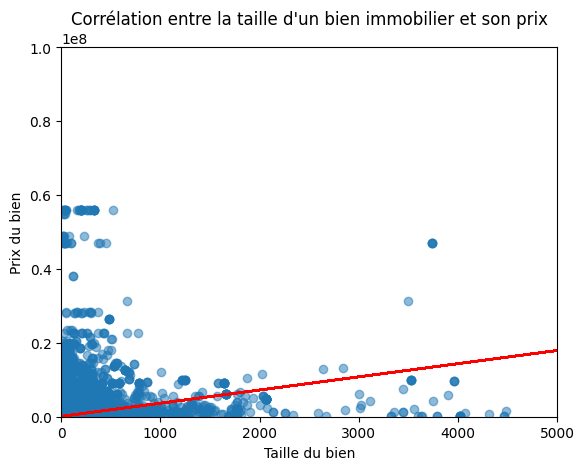

In [23]:
# Extraction des variables d'intérêt
taille_bien = dvf2022_metre_carre['Metre carre']
prix_bien = dvf2022_metre_carre['Valeur fonciere']

#On met les données dans un tableau
data = pd.DataFrame({'taille_bien': taille_bien, 'prix_bien': prix_bien})

# Création du nuage de points avec une régression linéaire
plt.scatter(data['taille_bien'],data['prix_bien'], alpha=0.5)
plt.title("Corrélation entre la taille d'un bien immobilier et son prix")
plt.xlabel("Taille du bien")
plt.ylabel("Prix du bien")

# Ajout d'une régression linéaire
coefficients = np.polyfit(taille_bien, prix_bien, 1)
pente = coefficients[0]
intercept = coefficients[1]
plt.plot(taille_bien, pente * taille_bien + intercept, color='red')

#Taille des x jusqu'à 5000
plt.xlim(0, 5000)

#Taille des y jusqu'à 100000000
plt.ylim(0, 100000000)

# Affichage du graphique
plt.show()


### 16. Progression des ventes en France en fonction du mois de vente

In [24]:
#On créé un tableau qui regroupe le nombre de ventes par jour
ventes_par_jours = dvf2022

ventes_par_jours = ventes_par_jours.groupby(pd.Grouper(key='Date mutation', freq='M')).size().reset_index(name='Nombre de ventes')

ventes_par_jours.sort_values('Date mutation', inplace=True)

fig = px.line(ventes_par_jours, x='Date mutation', y='Nombre de ventes', title='Évolution de mutation immobilière en France en 2022')
fig.show()

### 17. Nombre de ventes en France en 2022 par région par mois

In [25]:
#On créé un tableau qui regroupe le nombre de ventes par jour
ventes_par_jours_par_region = dvf2022

#On ajoute une colonne avec le nom de la région en utilisant la variable region qui est un map du nom de la région et des codes départements
for value,keys in region.items():
    for key in keys:
        ventes_par_jours_par_region.loc[ventes_par_jours_par_region['Code departement'] == key, 'Region'] = value

ventes_par_jours_par_region = ventes_par_jours_par_region.groupby([pd.Grouper(key='Date mutation', freq='d'), 'Region']).size().reset_index(name='Nombre de ventes')
ventes_par_jours_par_region.sort_values('Date mutation', inplace=True)
# On calcule le cumul du nombre de ventes par jour et par région
ventes_par_jours_par_region['Nombre de ventes cumulé'] = ventes_par_jours_par_region.groupby('Region')['Nombre de ventes'].cumsum()

fig = px.line(ventes_par_jours_par_region, x='Date mutation', y='Nombre de ventes cumulé', color='Region', title='Évolution de mutation immobilière par région en 2022')
fig.show()

### 18. Analyse du prix en fonction du nombre de pièces principales

In [26]:
#Analyse du prix en fonction du nombre de pièces principales

#On supprime les valeurs nulles et les valeurs égal à 0
prix_par_piece = dvf2022_metre_carre.query("`Nombre pieces principales`.notna() and `Nombre pieces principales` != 0")

prix_par_piece = dvf2022_metre_carre.groupby('Nombre pieces principales')['Valeur fonciere'].mean()

#On enlève les valeurs supérieurs à 20 pièces
prix_par_piece = prix_par_piece[prix_par_piece.index <= 20]

#On fait un graphique avec plotly
fig = px.bar(prix_par_piece, x=prix_par_piece.index, y='Valeur fonciere', title='Prix moyen par nombre de pièces principales')

fig.show()

### 19. Taille moyenne des terrains par département en France en 2022

In [27]:
moyenne_taille_terrain = dvf2022[dvf2022['Surface terrain'] > 0]
moyenne_taille_terrain = moyenne_taille_terrain.groupby('Code departement')['Surface terrain'].mean()

#On supprime les départements d'outre mer
moyenne_taille_terrain = moyenne_taille_terrain.drop(['971', '972', '973', '974'])

#On renomme les colonnes
moyenne_taille_terrain = moyenne_taille_terrain.reset_index()
moyenne_taille_terrain = moyenne_taille_terrain.rename(columns={'Code departement': 'Département', 0: 'Surface moyenne du terrain'})

fig = px.choropleth(moyenne_taille_terrain, 
                    geojson=departement_geojson, 
                    locations='Département', 
                    color='Surface terrain',
                    color_continuous_scale='blugrn',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Surface moyenne des terrains par département en France')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()


### 20. Prix au m² pour 1000 habitants par département en France en 2022
[Source : Insee - Estimations de population (résultats provisoires arrêtés fin 2022)](https://www.insee.fr/fr/statistiques/1893198)

In [28]:
#On importe le nombre d'habitants par departement
population = pd.read_csv('habitants_par_departement.csv', sep=';')

nombre_de_vente_par_departement = dvf2022_metre_carre.groupby('Code departement')['Metre carre'].mean()

#On supprime les départements d'outre mer
nombre_de_vente_par_departement = nombre_de_vente_par_departement.drop(['971', '972', '973', '974'])

#On ajoute le nombre d'habitants par département
nombre_de_vente_par_departement = pd.merge(nombre_de_vente_par_departement, population, on='Code departement')

#Convertion de la colonne en int
nombre_de_vente_par_departement['Population'] = nombre_de_vente_par_departement['Population'].astype(int)

#On ajoute une colonne nombre de ventes par 1000 habitants
nombre_de_vente_par_departement['Prix au m² pour 1000 habitants'] = nombre_de_vente_par_departement['Metre carre'] / (nombre_de_vente_par_departement['Population'] / 1000)

fig = px.choropleth(nombre_de_vente_par_departement, 
                    geojson=departement_geojson, 
                    locations='Code departement', 
                    color='Prix au m² pour 1000 habitants',
                    color_continuous_scale='brwnyl',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Prix au m² pour 1000 habitants par département en France en 2022')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

## Comparaison des données de 2019 et 2022
Après avoir fait une quinzaine d'analyses sur les données de 2022, nous avons décidé de comparer les données de 2019 et 2022 pour voir si il y avait une différence entre les deux années. La crise sanitaire a-t-elle eu un impact sur le prix de l'immobilier ? Est-ce que les prix ont augmenté ou diminué ? Nous allons essayer de répondre à ces questions via nos différentes analyses.

### 21. Carte de la France aves les départements où le prix moyen au mètre carré a augmenté entre 2019 et 2022

In [29]:
dvf2019_metre_carre = dvf2019_metre_carre[dvf2019_metre_carre['Metre carre'] > 0]
moyenne_prix_metre_carre_departement_2019 = dvf2019_metre_carre.groupby('Code departement')['Valeur fonciere'].mean() / dvf2019_metre_carre.groupby('Code departement')['Metre carre'].mean()

#On renomme les colonnes
moyenne_prix_metre_carre_departement_2019 = moyenne_prix_metre_carre_departement_2019.reset_index()
moyenne_prix_metre_carre_departement_2019 = moyenne_prix_metre_carre_departement_2019.rename(columns={'Code departement': 'Département', 0: 'Prix moyen au mètre carré'})

#On fait un tableau avec le prix de l'augmentation entre 2019 et 2022
moyenne_prix_metre_carre_departement_2019['Augmentation prix m2'] = moyenne_prix_metre_carre_departement['Prix moyen au mètre carré'] - moyenne_prix_metre_carre_departement_2019['Prix moyen au mètre carré']

fig = px.choropleth(moyenne_prix_metre_carre_departement_2019, 
                    geojson=departement_geojson, 
                    locations='Département', 
                    color='Augmentation prix m2',
                    color_continuous_scale='armyrose',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Augmentation du prix moyen par mètre carré par département en France entre 2019 et 2022')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

#Affiche les 3 plus grandes augmentations et les 3 plus grandes baisses
print(moyenne_prix_metre_carre_departement_2019.sort_values(by=['Augmentation prix m2'], ascending=False).head(3))
print(moyenne_prix_metre_carre_departement_2019.sort_values(by=['Augmentation prix m2'], ascending=True).head(3))



   Département  Prix moyen au mètre carré  Augmentation prix m2
47          47                1325.263809           4568.892309
34          34                2938.643277           4366.536357
91          94                4849.257575           2839.921323
   Département  Prix moyen au mètre carré  Augmentation prix m2
76          79                3929.526244          -2321.867562
80          83                5578.462227          -1523.861363
74          77                5029.214319          -1431.855100


On remarque que certains départements ont vu leur prix grandement augmentés, telles que : le 47, 34 et le 94, tandis que d'autres ont vu leur prix diminués, comme le 76, 80 et le 74.

### 22. Analyse de la demande de biens immobiliers en France entre 2019 et 2022

In [30]:
nombre_de_vente_par_local_2022 = dvf2022.groupby('Type local')['Valeur fonciere'].count()
nombre_de_vente_par_local_2019 = dvf2019.groupby('Type local')['Valeur fonciere'].count()

#On mets sur un seul et même histogramme les données de 2019 et 2022
fig = go.Figure()
fig.add_trace(go.Bar(
    x=nombre_de_vente_par_local_2022.index,
    y=nombre_de_vente_par_local_2022,
    name='2022',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=nombre_de_vente_par_local_2019.index,
    y=nombre_de_vente_par_local_2019,
    name='2019',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Nombre de ventes par type de local en 2019 et 2022')
fig.show()

### 23. Analyse des 10 villes en France qui ont enregistré plus de ventes en 2022 qu'en 2019

In [31]:
#On regroupe tous les arrondissements de Paris dans ensemble
dvf2022_q_18 = dvf2022
dvf2022_q_18['Commune'] = dvf2022_q_18['Commune'].replace(['PARIS 1ER ARRONDISSEMENT', 'PARIS 2', 'PARIS 3', 'PARIS 4', 'PARIS 5', 'PARIS 6', 'PARIS 7', 'PARIS 8', 'PARIS 9', 'PARIS 10', 'PARIS 11', 'PARIS 12', 'PARIS 13', 'PARIS 14', 'PARIS 15', 'PARIS 16', 'PARIS 17', 'PARIS 18', 'PARIS 19', 'PARIS 20'], 'PARIS')

dvf2019_q_18 = dvf2019
dvf2019_q_18['Commune'] = dvf2019_q_18['Commune'].replace(['PARIS 1ER ARRONDISSEMENT', 'PARIS 2', 'PARIS 3', 'PARIS 4', 'PARIS 5', 'PARIS 6', 'PARIS 7', 'PARIS 8', 'PARIS 9', 'PARIS 10', 'PARIS 11', 'PARIS 12', 'PARIS 13', 'PARIS 14', 'PARIS 15', 'PARIS 16', 'PARIS 17', 'PARIS 18', 'PARIS 19', 'PARIS 20'], 'PARIS')

#On group le nombre de ventes par commune
nombre_de_vente_par_commune_2022 = dvf2022_q_18.groupby('Commune')['Valeur fonciere'].count()
nombre_de_vente_par_commune_2019 = dvf2019_q_18.groupby('Commune')['Valeur fonciere'].count()

#On compte le nombre de ventes en 2019 et 2022 par commune sur un seul tableau
nombre_de_vente_par_commune = pd.DataFrame({'Nombre de ventes 2022': nombre_de_vente_par_commune_2022, 'Nombre de ventes 2019': nombre_de_vente_par_commune_2019})

#On ajoute une colonne qui donne le nombre de ventes en plus en 2022 par rapport à 2019
nombre_de_vente_par_commune['Augmentation nombre de ventes'] = nombre_de_vente_par_commune['Nombre de ventes 2022'] - nombre_de_vente_par_commune['Nombre de ventes 2019']

#On affiche le top 10
nombre_de_vente_par_commune = nombre_de_vente_par_commune.sort_values(by=['Augmentation nombre de ventes'], ascending=False).head(10)

#On fait un histogramme
fig = go.Figure()
fig.add_trace(go.Bar(
    x=nombre_de_vente_par_commune.index,
    y=nombre_de_vente_par_commune['Augmentation nombre de ventes'],
    name='Augmentation nombre de ventes',
    marker_color='indianred'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Augmentation du nombre de ventes par commune entre 2019 et 2022')
fig.show()

### 24. Analyse de l'évolution du prix moyen au mètre carré entre 2019 et 2022 dans les arrondissements de Paris

In [32]:
#On créé un nouveau tableau qui contient que les arrondissements de Paris
dvf2019_paris = dvf2019_metre_carre[dvf2019_metre_carre['Code departement'] == '75']

#On créé une colonne pour le numéro de l'arrondissement
dvf2019_paris['Arrondissement'] = dvf2019_paris['Commune'].str.split(' ').str[1].astype(int)

#On récupère la moyenne du prix au mètre carré par arrondissement
prix_m2_arrondissement_2019 = dvf2019_paris.groupby('Arrondissement')['Valeur fonciere'].mean() / dvf2019_paris.groupby('Arrondissement')['Metre carre'].mean()
prix_m2_arrondissement_2022 = dvf2022_paris.groupby('Arrondissement')['Valeur fonciere'].mean() / dvf2022_paris.groupby('Arrondissement')['Metre carre'].mean()

#Tout dans un seul tableau
prix_m2_arrondissement = pd.DataFrame({'Prix moyen au mètre carré 2019': prix_m2_arrondissement_2019, 'Prix moyen au mètre carré 2022': prix_m2_arrondissement_2022})

#On ajoute une colonne qui donne le nombre de ventes en plus en 2022 par rapport à 2019
prix_m2_arrondissement['Augmentation prix au mètre carré'] = prix_m2_arrondissement['Prix moyen au mètre carré 2022'] - prix_m2_arrondissement['Prix moyen au mètre carré 2019']
prix_m2_arrondissement['code'] = ['7510' + str(index) if index < 10 else '751' + str(index) for index in prix_m2_arrondissement.index]

#On fait un geojson avec les départements
arrondissement_geojson_url = "https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson"
arrondissement_geojson = requests.get(arrondissement_geojson_url).json()


fig = px.choropleth(prix_m2_arrondissement, 
                    geojson=arrondissement_geojson, 
                    locations='code', 
                    color='Augmentation prix au mètre carré',
                    color_continuous_scale='fall',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Augmentation du prix au mètre carré par arrondissement entre 2019 et 2022')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

### 25. Analyse des écarts de prix entre les différentes régions en 2019 et en 2022

In [33]:
geojson_region_url = 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
geojson_region = requests.get(geojson_region_url).json()

#Comparaison du prix moyen du mètre carré entre les différentes régions de France

#On enlève les départements d'outre mer
for i in range(971, 975):
    moyenne_prix_metre_carre_departement_2019 = moyenne_prix_metre_carre_departement_2019[moyenne_prix_metre_carre_departement_2019['Département'] != str(i)]

#On créé un tableau qui regroupe les régions
group_by_region_comparaison = []
for key, value in region.items():
    _temp_moyenne = 0
    for i in value:
        _temp = moyenne_prix_metre_carre_departement_2019[moyenne_prix_metre_carre_departement_2019['Département'] == i]
        _temp_moyenne = _temp_moyenne + _temp['Augmentation prix m2'].mean()
    _temp_moyenne = _temp_moyenne/len(value)
    group_by_region_comparaison.append([key,_temp_moyenne])
    
#On fait un pie chart
group_by_region_comparaison = pd.DataFrame(group_by_region_comparaison, columns=['Region', 'Augmentation du prix moyen au mètre carré'])    
group_by_region_comparaison

#On fait un geojson
fig = px.choropleth(group_by_region_comparaison,
                    geojson=geojson_region,
                    locations='Region',
                    color='Augmentation du prix moyen au mètre carré',
                    color_continuous_scale='tropic',
                    featureidkey='properties.nom',
                    projection="mercator",
                    title='Augmentation du prix moyen par mètre carré par région en France entre 2019 et 2022')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()


## Site Django
Nous avons décidé de créer un site web avec Django pour pouvoir visualiser nos données de manière plus interactive.

### 1. Page d'accueil avec le choix du graphique à afficher

Nous avons cliqué sur le formumaire et nous avons choisi le graphique "Nombre de ventes par département en France". Nous avons ensuite cliqué sur le bouton "Submit".

![Homepage avec form](./images/homepage.png)

### 2. Graphique par défaut (France) du nombre de ventes

Nous arrivons alors sur la page par défaut du graphique "Nombre de ventes par département en France". Nous pouvons voir que le graphique est dynamique et que nous pouvons zoomer sur la carte. Nous pouvons aussi passer la souris sur les différents départements pour avoir plus d'informations sur le nombre de ventes. Par défaut, le graphique affiche le nombre de ventes en France.

![Nombre Ventes Defaut France](./images/nombreVentesFrance.png)

### 3. Formulaire pour choisir la région à afficher

Un nouveau formulaire est apparu en haut de la page. Nous pouvons choisir la région que nous souhaitons afficher. Nous avons choisi la région "Occitanie" et nous avons cliqué sur le bouton "Submit".

![Formulaire Region Nombre Ventes](./images/nombreVentesFormRegions.png)

### 4. Graphique du nombre de ventes en Occitanie

Nous arrivons alors sur la page du graphique "Nombre de ventes en Occitanie". On peut remarquer que l'url a changé et que le graphique a été mis à jour. L'url est dynamique et change en fonction du formulaire.

![Nombre Ventes Occitanie](./images/nombreVentesOccitanie.png)

### 5. Autre exemple

Nous avons fait de même pour les 5 différents graphiques que nous avons créé. Ici nous pouvons observer l'évolution de mutation en fonction du mois de vente. Nous avons choisi la région "Île-de-France".

![Evolution Mutation Ile de France](./images/progressionVentesIdF.png)

Ou encore le prix moyen en fonction du nombre de pièces principales. Ici nous avons choisi la région "Bretagne".

![Prix Nombre Pieces Bretagne](./images/prixNombrePiecesBretagne.png)
